In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))

def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

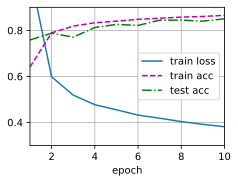

In [2]:
batch_size,lr,num_epochs=256,0.1,10
loss=nn.CrossEntropyLoss(reduction='none')
trainer=torch.optim.SGD(net.parameters(),lr=lr)
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

Exercises

添加隐藏层

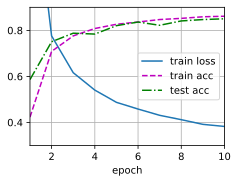

In [3]:
# 两个隐藏层
net=nn.Sequential(nn.Flatten(),nn.Linear(784,512),nn.ReLU(),nn.Linear(512,256),nn.ReLU(),nn.Linear(256,10))
net.apply(init_weights)
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

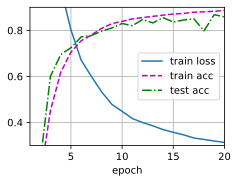

In [6]:
# 三个隐藏层
net=nn.Sequential(nn.Flatten(),nn.Linear(784,512),nn.ReLU(),nn.Linear(512,256),nn.ReLU(),nn.Linear(256,128),nn.ReLU(),nn.Linear(128,10))
net.apply(init_weights)
num_epochs=20
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

更换激活函数

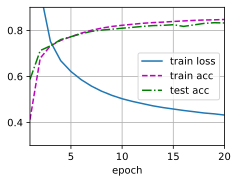

In [10]:
# sigmoid
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.Sigmoid(),nn.Linear(256,10))
net.apply(init_weights)
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

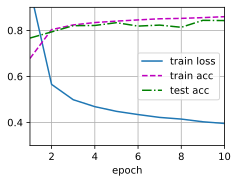

In [12]:
# tanh
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.Tanh(),nn.Linear(256,10))
net.apply(init_weights)
num_epochs=10
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

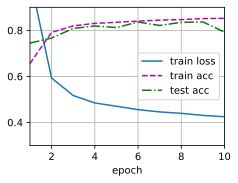

In [13]:
#pReLU
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.PReLU(),nn.Linear(256,10))
net.apply(init_weights)
trainer=torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

增加迭代次数

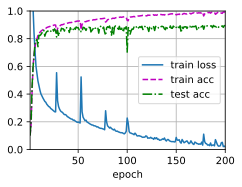

In [26]:
# 三层隐藏层,200个epoch
net=nn.Sequential(nn.Flatten(),nn.Linear(784,512),nn.ReLU(),nn.Linear(512,256),nn.ReLU(),nn.Linear(256,128),nn.ReLU(),nn.Linear(128,10))
net.apply(init_weights)
num_epochs=200
trainer=torch.optim.SGD(net.parameters(),lr=lr)

def train(net,train_iter,test_iter,loss,num_epochs,updater):
    animator=d2l.Animator(xlabel='epoch',xlim=[1,num_epochs],ylim=[0,1],legend=['train loss','train acc','test acc'])
    for epoch in range(num_epochs):
        train_metrics=d2l.train_epoch_ch3(net,train_iter,loss,updater)
        test_acc=d2l.evaluate_accuracy(net,test_iter)
        animator.add(epoch+1,train_metrics+(test_acc,))

train(net,train_iter,test_iter,loss,num_epochs,trainer)

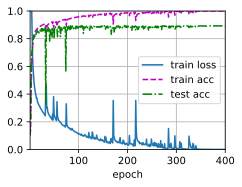

In [28]:
# 400个epoch
net=nn.Sequential(nn.Flatten(),nn.Linear(784,512),nn.ReLU(),nn.Linear(512,256),nn.ReLU(),nn.Linear(256,128),nn.ReLU(),nn.Linear(128,10))
net.apply(init_weights)
num_epochs=400
trainer=torch.optim.SGD(net.parameters(),lr=lr)
train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)